# Problem 4

## Self Inductance Formula
$$
L_{\text{self}} = \frac{\mu}{2\pi} l \left[ \ln \left( \frac{l}{r} + \sqrt{1 + \frac{l^2}{r^2}} \right) - \sqrt{1 + \frac{r^2}{l^2} + \frac{r}{l} + \frac{1}{4}} \right]
$$

* l = length in meters
* r = radius in meters
* $\mu$ = 4($\pi$) x 10E-7 H/m

Necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Making the formula into a function:

In [34]:
def selfInduct(r: float, l: float) -> float:
    # Constant for mu
    mu = (4 * np.pi) * (10 ** -7)
    
    # The actual formula
    lSelf = 0
    
    if (l > r):
        # Convert from mm to cm
        r * 1e-1
        l * 1e-1
        
        lSelf = (.002 * l) * (np.log((2 * l) / r) - (3 / 4)) # returns uH/cm
        lSelf *= 100 # puts in back in nH/mm
    else:
        # Convert from mm to m
        r *= 1e-3
        l *= 1e-3
        
        outside = ((mu / (2 * np.pi)) * l)
        inside1 = np.log((l / r) + np.sqrt(1 + ((l ** 2) / (r ** 2))))
        inside2 = np.sqrt(1 + ((r ** 2) / (l ** 2)))
        lSelf = outside * (inside1 - inside2 + (r / l) + (1 / 4))
        # returns in henries / m, so make it into nano henries / mm
        lSelf *= 1e6
    
    return lSelf # Returns H/m

Making a range of lengths:

In [35]:
# Arranging an array from 2mm to 20mm (.002m to .02m)
lengths = np.linspace(2, 20, 15) # This is in mm

print(lengths)

[ 2.          3.28571429  4.57142857  5.85714286  7.14285714  8.42857143
  9.71428571 11.         12.28571429 13.57142857 14.85714286 16.14285714
 17.42857143 18.71428571 20.        ]


Calculate the inductances:

In [36]:
# 5 mil diamter = 0.000127m 
diam = 0.000127 * 1e3 # put it in mm
r = diam / 2

# Generate a list of inductances to plot
lSelfs = []
for len in lengths:
    induct = selfInduct(r, len)
    lSelfs.append(induct) # These are in Henries
    
print("Self inductances in nH/mm:\n", lSelfs)

Self inductances in nH/mm:
 [1.3572038936813529, 2.5559220649113503, 3.858000738183177, 5.233385809228277, 6.6656791571661005, 8.144511458889621, 9.662722498970505, 11.215067218171974, 12.797536407782296, 14.40696523251209, 16.04079153108193, 17.696898435227215, 19.37350745192024, 21.06910326686843, 22.78237930878971]


Calculate the inductances using the rule of thumb:

In [37]:
# Rule of thumb is ~1 nH/mm (1uH/m)
lSelfs_rot = (lengths) * 1 # put them in nH/mm
print(lSelfs_rot) # this is in nH/mm|


[ 2.          3.28571429  4.57142857  5.85714286  7.14285714  8.42857143
  9.71428571 11.         12.28571429 13.57142857 14.85714286 16.14285714
 17.42857143 18.71428571 20.        ]


Plot the values:

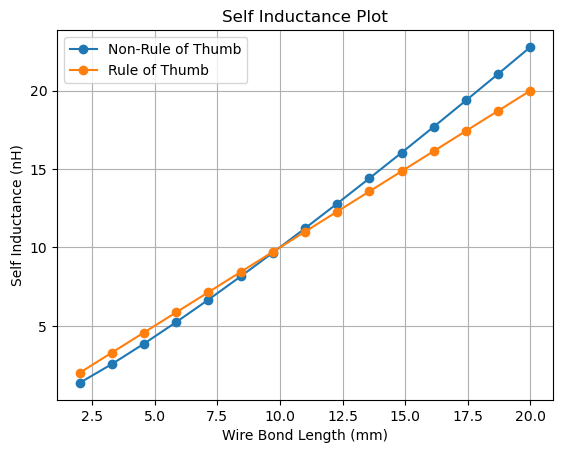

In [38]:
fig, ax = plt.subplots()

ax.plot(lengths, lSelfs, marker='o', linestyle='-', label='Non-Rule of Thumb')
ax.plot(lengths, lSelfs_rot, marker='o', linestyle='-', label='Rule of Thumb')

ax.set(xlabel='Wire Bond Length (mm)', ylabel='Self Inductance (nH)',
       title="Self Inductance Plot")
ax.grid()
ax.legend()

It seems to the stay close together until around 10mm. That's when then non-rule of thumb method over takes the other.